Divide y Vencerás


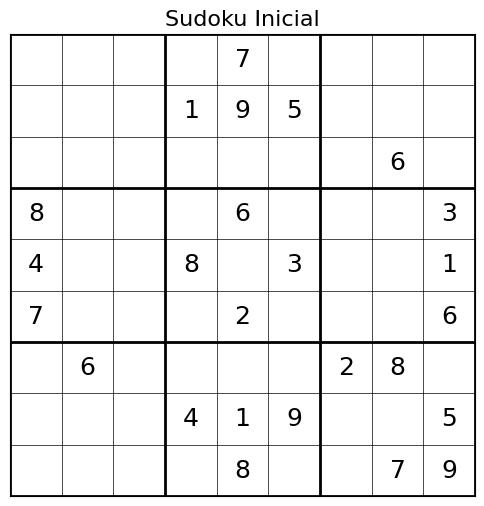

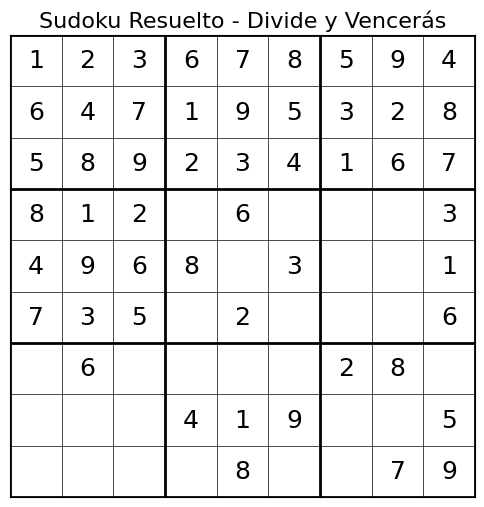

Tiempo de ejecución: 0.0279 segundos
Memoria usada: 95.29 KB


In [ ]:
import time  # Para medir el tiempo de ejecución
import tracemalloc  # Para rastrear el uso de memoria
import matplotlib.pyplot as plt  # Para graficar el tablero de Sudoku
import numpy as np  # Para trabajar con arreglos numéricos, como el tablero de Sudoku

def visualize_board(board, title="Sudoku"):
    """
    Dibuja el tablero de Sudoku gráficamente utilizando matplotlib.
    :param board: Tablero de Sudoku representado como un arreglo de 9x9.
    :param title: Título de la ventana gráfica.
    """
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_title(title, fontsize=16)

    # Dibuja las líneas del tablero de 9x9
    for i in range(10):
        lw = 2 if i % 3 == 0 else 0.5  # Líneas gruesas para los bordes de subcuadros de 3x3
        ax.plot([i, i], [0, 9], color='black', lw=lw)  # Líneas verticales
        ax.plot([0, 9], [i, i], color='black', lw=lw)  # Líneas horizontales

    # Coloca los números en las celdas correspondientes
    for i in range(9):
        for j in range(9):
            num = board[i, j]
            if num != 0:  # Solo se muestran las celdas no vacías
                ax.text(j + 0.5, 8.5 - i, str(num), ha='center', va='center', fontsize=18, color='black')

    # Ajusta la vista para mostrar solo el tablero
    ax.set_xlim(0, 9)
    ax.set_ylim(0, 9)
    ax.set_xticks([])  # Quita las marcas del eje x
    ax.set_yticks([])  # Quita las marcas del eje y

    # Muestra la visualización del tablero
    plt.show()

def measure_execution(func, board):
    """
    Mide el tiempo de ejecución y el uso máximo de memoria de una función que resuelve Sudoku.
    :param func: Función que resuelve el Sudoku.
    :param board: Tablero inicial de Sudoku.
    :return: Resultado de la función, tiempo de ejecución y memoria usada en KB.
    """
    tracemalloc.start()  # Inicia el rastreo de memoria
    start_time = time.time()  # Marca el tiempo inicial
    result = func(board)  # Ejecuta la función
    end_time = time.time()  # Marca el tiempo final
    current, peak = tracemalloc.get_traced_memory()  # Obtiene el uso de memoria
    tracemalloc.stop()  # Detiene el rastreo de memoria

    execution_time = end_time - start_time  # Calcula el tiempo de ejecución
    memory_used = peak / 1024  # Convierte el uso de memoria de bytes a KB

    return result, execution_time, memory_used

def solve_sudoku_divide_and_conquer(board):
    """
    Resuelve un Sudoku usando una técnica basada en divide y vencerás.
    :param board: Tablero inicial de Sudoku representado como un arreglo de 9x9.
    :return: Tablero resuelto.
    """
    def is_valid(num, row, col):
        """
        Verifica si un número puede colocarse en una celda sin violar las reglas del Sudoku.
        :param num: Número a verificar.
        :param row: Fila de la celda.
        :param col: Columna de la celda.
        :return: True si es válido, False en caso contrario.
        """
        # Verifica filas y columnas
        for i in range(9):
            if board[row][i] == num or board[i][col] == num:
                return False
        # Verifica el subcuadro de 3x3
        box_row, box_col = row // 3 * 3, col // 3 * 3
        for i in range(box_row, box_row + 3):
            for j in range(box_col, box_col + 3):
                if board[i][j] == num:
                    return False
        return True

    def solve_block(start_row, start_col):
        """
        Resuelve un subcuadro de 3x3 en el tablero.
        :param start_row: Fila inicial del subcuadro.
        :param start_col: Columna inicial del subcuadro.
        :return: True si el subcuadro puede resolverse, False en caso contrario.
        """
        for row in range(start_row, start_row + 3):
            for col in range(start_col, start_col + 3):
                if board[row][col] == 0:  # Busca una celda vacía
                    for num in range(1, 10):  # Prueba números del 1 al 9
                        if is_valid(num, row, col):
                            board[row][col] = num  # Asigna el número
                            if solve_block(start_row, start_col):  # Llamada recursiva
                                return True
                            board[row][col] = 0  # Retrocede si no es válido
                    return False
        return True

    def solve_entire_board():
        """
        Resuelve el tablero completo dividiéndolo en subcuadros de 3x3.
        :return: True si el tablero puede resolverse, False en caso contrario.
        """
        for block_row in range(0, 9, 3):
            for block_col in range(0, 9, 3):
                if not solve_block(block_row, block_col):
                    return False
        return True

    solve_entire_board()  # Inicia la resolución del tablero
    return board

# Ejemplo de uso
sudoku_board = np.array([  # Tablero de Sudoku inicial
    [0, 0, 0, 0, 7, 0, 0, 0, 0],
    [0, 0, 0, 1, 9, 5, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 6, 0],
    [8, 0, 0, 0, 6, 0, 0, 0, 3],
    [4, 0, 0, 8, 0, 3, 0, 0, 1],
    [7, 0, 0, 0, 2, 0, 0, 0, 6],
    [0, 6, 0, 0, 0, 0, 2, 8, 0],
    [0, 0, 0, 4, 1, 9, 0, 0, 5],
    [0, 0, 0, 0, 8, 0, 0, 7, 9],
])

# Visualiza el tablero inicial
print("Divide y Vencerás")
visualize_board(sudoku_board, "Sudoku Inicial")

# Resuelve el Sudoku y mide el rendimiento
solved_board, exec_time, mem_used = measure_execution(solve_sudoku_divide_and_conquer, sudoku_board)

# Visualiza el tablero resuelto
visualize_board(solved_board, "Sudoku Resuelto - Divide y Vencerás")

# Muestra estadísticas de rendimiento
print(f"Tiempo de ejecución: {exec_time:.4f} segundos")
print(f"Memoria usada: {mem_used:.2f} KB")
